If the file is in other format, you can override the `IDF.load_spectrum_from_file()` method:

In [22]:
#define new load_spectrum_from_file()
def new_load_spectrum_from_file(file_path):
    #code to load your file format
    #...
    #place holder code:
    data_x = np.arange(1, 1024)
    data_y = 2 * data_x
    
    return data_x, data_y


#overide the original load_spectrum_from_file with the new method:
idf_file.load_spectrum_from_file = new_load_spectrum_from_file

#load the spectrum as above:
idf_file.set_spectrum_data_from_file(path_data)

#verify that the new method is being used:
print(idf_file.get_dataxy())

NameError: name 'path_data' is not defined

In [1]:
import sys
sys.path.insert(0, '/home/msequeira/Dropbox/CTN/Radiate/IDF_python/GUI/test/')

from pyIBA import IDF
from pyIBA.codes import NDF

In [10]:
idf_file = IDF()


idf_file.set_data_from_geo_file('Example3/raw_data_files/G_RBS_2300_00_30.GEO')
idf_file.set_charge(5)
idf_file.set_data_from_str_file('Example3/raw_data_files/2IN.str', type = 'initial')
idf_file.set_spectrum_data_from_file('Example3/raw_data_files/RBS1_2IN_P_1.odf')

idf_file.get_geo_parameters()
idf_file.save_idf('Example3/idf_example3_1.xml')

In [9]:
help(idf_file.set_data_from_str_file)

Help on method set_data_from_str_file in module pyIBA.codes.NDF:

set_data_from_str_file(str_file, spectra_id=0, simulation_id=0, type='result') method of pyIBA.IDF.IDF instance



In [ ]:
plt.figure()
plt.plot(data_x, data_y)

In [27]:

from copy import deepcopy

class exp:
    def __init__(self, id):
        self.id = id
        
    def copy(self):
        print('aa')
        return deepcopy(self) 

In [28]:
a = exp(1)
b = a.copy()
a.id = 2

aa


In [29]:
a.id, b.id

(2, 1)

In [45]:
from pyIBA.auxiliar import load_spectrum_from_file
import matplotlib.pyplot as plt
import numpy as np

(2.0, 600.0)

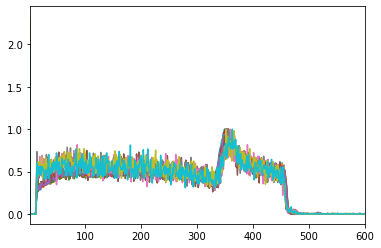

In [52]:
nfiles = 20
file_names = ['Example3/raw_data_files/RBS1_2IN_P_%i.odf'%i for i in range(1, nfiles + 1)]

plt.figure()

for file in file_names:
    xx, yy = load_spectrum_from_file(file)
    yy /= max(yy[10:])
    
    new_name = file[:-4] + '_n.odf'
    
    data = np.array([xx, yy])
    data = data.T

    np.savetxt(new_name, data, delimiter='  ', fmt=' %i   %f')
    
    plt.plot(xx, yy)
    
plt.xlim(2,600)

In [47]:
!cat $file